#INSTALL LIBRARY

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.5 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.14-py2.py3-none-any.whl size=33654 sha256=4547c963518702d8a32f5e292c8124e2c1455388569fb138a4ab9daf1f7465f0
  Stored in directory: /root/.cache/pip/wheels/d9/6a/86/9a622c06f65732afe0e31c02a92fae6ab663ffd7162bcf5125
Successfully built jcopml


# IMPORT LIBRARY

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from tqdm.auto import tqdm

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian")
punct = list(punctuation)
import gensim
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORT DATA

In [ ]:
df_dataset = pd.read_excel('/content/drive/MyDrive/sentiment/zenius.xlsx' )
pd.set_option('display.max_colwidth', -1)
df_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,user Name,ranting,tanggal,ulasan
0,Suherlambang,5,2022-05-22 08:06:49,"Good app, benar² membantu semua kalangan yg selalu ingin belajar"
1,M Farros Kasyfil Aziz,1,2022-05-22 02:15:08,video materi ngelaaaaaag terus
2,Faradila Dwi,5,2022-05-22 00:44:24,keren BANGETT sangatt memudahkan dalam belajar luvv zenius✨😔🤍✊🏻
3,Fadmala Anggriana,5,2022-05-21 18:55:52,"Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur"" keren lagi ya.."
4,S F,5,2022-05-21 13:46:17,"Aplikasinya menurutku multifungsi banget niih. Karena nggak hanya bisa dimanfaatkan untuk belajar daring saja, di Zenius ini juga tersedia salah satu fitur yang bisa dijadikan tempat berlatih dan mengasah kemampuan berpikir yaitu ZenCore. Dan menariknya, ZenCore ini bisa dimainkan siapa saja, tidak hanya siswa, profesional pun memanfaatkan fitur ZenCore."
...,...,...,...,...
2495,Adinda Cyntia S.,5,2019-03-25 14:47:46,"Gue seneng banget saat tau Zenius udah punya app. karena jujur aja buka2 web mulu bikin males karena web kadang log out sendiri. karena masih baru jadi belum selengkap di web, gue harap dalam waktu cepat app nya bakal maksimal. karena masih ada yang kosong videonya. semangat zen!"
2496,Al Amien,5,2019-03-24 17:12:33,"Seharusnya di zenius ada fitur buat nyetel semua video, jadi bisa otomatis dari video 1 ke video 2, dan seterusnya, overall udah ada aplikasinya bantu banget, thanks :)"
2497,Sachi Emelin,5,2019-03-23 01:05:59,"Keren banget appnya, semoga kedepannya video yang ditonton bisa diunduh terlebih dahulu dan kualitas gambar ditingkatkan😆"
2498,Miftahul Huda,5,2019-03-21 12:31:18,"UI/UX nya minimalis simple & bagus jadi lebih enak nonton lewat hp. Udah lama loh nungguin appsnya haha 😄 Saranku sih videonya bisa tetep muter meskipun appsnya di background Zen. Thanks Zen, mas dan mbak developer semangat ya, meskipun appsnya masih beta tetep yakin bisa nyalip app RG sebelah hehe."


#DROP FILE

menghilangkan coloumn yang tidak perlu


In [ ]:
df_dataset = df_dataset.drop(['user Name', 'tanggal'], axis=1)

In [ ]:
df_dataset.head()

,ranting,ulasan
0,5,"Good app, benar² membantu semua kalangan yg selalu ingin belajar"
1,1,video materi ngelaaaaaag terus
2,5,keren BANGETT sangatt memudahkan dalam belajar luvv zenius✨😔🤍✊🏻
3,5,"Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur"" keren lagi ya.."
4,5,"Aplikasinya menurutku multifungsi banget niih. Karena nggak hanya bisa dimanfaatkan untuk belajar daring saja, di Zenius ini juga tersedia salah satu fitur yang bisa dijadikan tempat berlatih dan mengasah kemampuan berpikir yaitu ZenCore. Dan menariknya, ZenCore ini bisa dimainkan siapa saja, tidak hanya siswa, profesional pun memanfaatkan fitur ZenCore."


#MENGUBAH LABEL ANGKA KE HURUF
bila rating kecil dari 3 maka label negatif
bila rating sama dengan 3 maka label netral
bila rating lebih dari 3 maka label positif

In [ ]:
def rantingg(x):
    if(x < 3):
        return 'negatif'
    if(x == 3 ):
        return 'netral'
    if(x > 3):
        return 'positif'
df_dataset['ranting'] =df_dataset['ranting'].apply(rantingg)

#Cek Jumlah label
setelah di cek, label tidak seimbang


In [ ]:
df_dataset.ranting.value_counts()

positif    1899
negatif    361 
netral     240 
Name: ranting, dtype: int64

#PREPROCESSING


##CLEANING

In [ ]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [ ]:
def cleaning_tweet(tweet):
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space  
    return tweet

##2.KOMBINASI FITUR PREPROCESING(CASEFOLDING)

kombinasi fitur dilakukan untuk meningkankan akurasi ml. adapun kombinasi fitur yang dipercobakan adalah casefolding, remove punction, remove single character, double spaces with single space, pengulangan dan stopword removal. adapun kombinasi fitur yang digunakan hanya casefolding saja  dapat meningkatkan akurasi. 

In [ ]:
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    #tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    #tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    #tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    #tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [ ]:
def stopword_removal(Tweet):
    filtering=stopwords.words('indonesian')
    x=[]
    data=[]
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit= filter(myFunc,Tweet)
    for x in fit:
        data.append(x)
    return data

##FUNGSI PREPROCESSING

digunakan untuk mengeksekusi perintah fungsi preprocesing

In [ ]:
df_dataset['ulasan'] = df_dataset['ulasan'].apply(cleaning_tweet)

In [ ]:
df_dataset["ulasan"] = df_dataset["ulasan"].apply(process_tweet)

In [ ]:
#df_dataset["ulasan"] = df_dataset["ulasan"].apply(stopword_removal)

##IMBALANCE DATA OVER SAMPING 

karena data tidak seimbang. dilakukan penyeimbangan data dengan over sampling. dimana oversampling akan mencari data yang memiliki kelas paling banyak dan menyesuakan datanya dengan kelas lainnya.

In [ ]:
X = df_dataset.drop(['ranting'], axis=1)
y = df_dataset.ranting

In [ ]:
y.value_counts()

positif    1899
negatif    361 
netral     240 
Name: ranting, dtype: int64

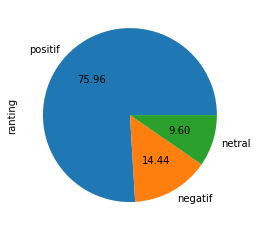

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7f5ed4d0a350>,
 [Text(-0.8009185686652888, 0.7540089166363653, ''),
  Text(0.5407966959740084, -0.9578825260038916, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.43686467381743016, 0.4112775908925628, '75.96'),
  Text(0.29498001598582274, -0.5224813778203045, '14.44'),
  Text(0.5729187096941336, -0.17822500408867725, '9.60')])

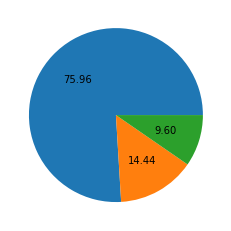

In [ ]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f')

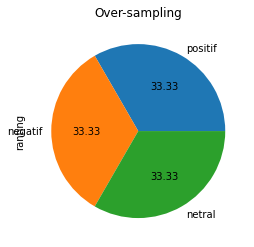

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

positif    1899
negatif    1899
netral     1899
Name: ranting, dtype: int64

In [ ]:
X_res, y_res

(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ulasan
 0     good app, benar² membantu semua kalangan yg selalu ingin belajar                                                                                                                                                                                                                                                                                                                                                                                                                                            


## TF-IDF

In [ ]:
tf = TfidfVectorizer()  

In [ ]:
vecs = tf.fit_transform(X_res.ulasan)

##Data Set Splitting

adapun dataset yang di split adalah 80% train dan 20%  test

In [ ]:
from sklearn.model_selection import train_test_split

X = vecs
y = y_res

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=62)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4557, 6718), (1140, 6718), (4557,), (1140,))

##Improvement Model (Parameter Tuning)

Parameter tuning dilakukan untuk mencari parameter terbaik dari train model yang dilakukan. adapun paramter yang digunakan yaitu, kernel, nilai C dan nilai Gamma

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import f1_score, make_scorer


X = X_train
y = y_train
parameters = { 
    'kernel': ['poly','sigmoid','rbf'], 
    'C': [0.1, 1, 10], 
    'gamma' : [1, 0.1, 0.001]
    }

clf = GridSearchCV(SVC(random_state=42), param_grid=parameters, verbose=1, scoring='accuracy')

clf.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['poly', 'sigmoid', 'rbf']},
             scoring='accuracy', verbose=1)

###NIlai train

In [ ]:
print('acc training', clf.score(X, y))

acc training 1.0


###PARAMETER TERBAIK

In [ ]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

###TESTING MODEL

In [ ]:
predict_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict_test)
accuracy

0.9921052631578947

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

     negatif       1.00      0.98      0.99       380
      netral       1.00      1.00      1.00       380
     positif       0.98      1.00      0.99       380

    accuracy                           0.99      1140
   macro avg       0.99      0.99      0.99      1140
weighted avg       0.99      0.99      0.99      1140



In [ ]:
from jcopml.plot import plot_confusion_matrix

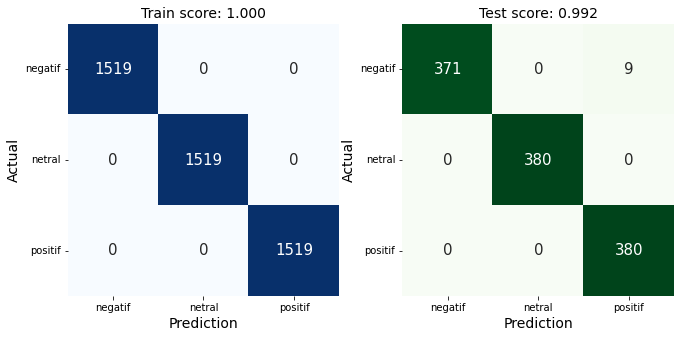

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)